<a href="https://colab.research.google.com/github/jackson-gregoire/MachineLearningLearning/blob/main/simple_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
import sklearn as sk
from sklearn import datasets, decomposition
import pandas as pd
from pandas import plotting
import seaborn as sns
from numpy.random import default_rng
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [310]:
X, y =  sk.datasets.fetch_california_housing(return_X_y=True)
df_obj = sk.datasets.fetch_california_housing(as_frame= True)
X = X[:, :-2] # Removed Latitude and Longitude
# Standardize X and y
scaler = StandardScaler()
X = scaler.fit_transform(X, y)
# Stick the bias at the front
X = np.concatenate((np.ones((X.shape[0],1)), X), axis = 1)
# Need to shuffle X, and y
np.set_printoptions(suppress = True)

In [312]:
print(df_obj.feature_names)
print(X.shape, y.shape)
df_obj.frame.head()

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 7) (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [295]:
'''
  Stochastic Gradient Descent
  Not portable, just wanted to see what a training implementation would look 
  like. Doesn't seem to converge for CA housing data.
'''
# Initialize some random weights including the bias (let's just start with 1's)
w = np.ones(X.shape[1])
epochs = 1 # Just running 1 epoch for now
eta = 10**-5 # Learning rate
loss = []

for e in range(epochs):
  # Reshuffle the samples in X and y (in unison) at each epoch
  X_shuffled, y_shuffled = sk.utils.shuffle(X, y, random_state=42)

  # Online learning portion of the method (update for each sample of X)
  # Renamed some of the variables for clarity
  for x, label in zip(X_shuffled, y_shuffled):
    estimate = np.dot(w, x) # Calculate an estimate
    error = estimate - label
    Q = error**2 # Calculate squared residual/error/loss for objective function
    loss.append(Q)
    gradQ = 2*error*x # Calculate gradient of objective function Q
    w -= eta*gradQ # Update weights


  

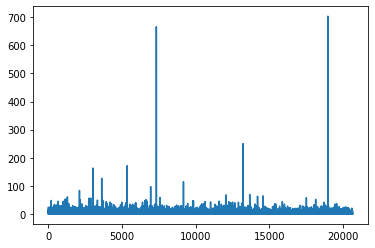

In [296]:
'''
  Something definetly not right about the loss.
'''
plt.plot(loss)
plt.show()